### Time series Analysis and Modeling. 



-  Check the data type, convert it into datetime and visualize as a time series.


-  Autoregression and How to explore a time series data for autocorrelation. Display the autocorrelation plot. 


-  Compute the correlation between the time series and its lags at t1, t2, t3...


-  Differencing is a method of transforming a time series dataset. 


-  MA - How to compute and visualize Moving Average. 


- Time series decomposition: trend seasonality and noise
    
    
-  Resampling    


-  Variability in a time series or volatility in finance


-  Volatility modeling


-  Stationarity of a time series and how to test for stationarity. 

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from pandas.plotting import autocorrelation_plot
import statsmodels

In [58]:
print(statsmodels.__version__)

0.14.0


In [59]:
pm10 = pd.read_csv('data/PM10.csv')
pm10

,datetime,PM10
0,2020-01-01 00:00:00,42.0
1,2020-01-02 00:00:00,39.0
2,2020-01-03 00:00:00,49.0
3,2020-01-04 00:00:00,44.0
4,2020-01-05 00:00:00,27.0
...,...,...
287,2020-10-14 00:00:00,9.0
288,2020-10-15 00:00:00,14.0
289,2020-10-16 00:00:00,9.0
290,2020-10-17 00:00:00,10.0


### Check the data type, convert it into datetime and visualize as a time series. 

In [60]:
pm10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  292 non-null    object 
 1   PM10      292 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.7+ KB


In [61]:
pm10['datetime'] = pd.to_datetime(pm10['datetime'])

In [62]:
pm10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  292 non-null    datetime64[ns]
 1   PM10      292 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.7 KB


In [63]:
pm10 = pm10.set_index(['datetime'])

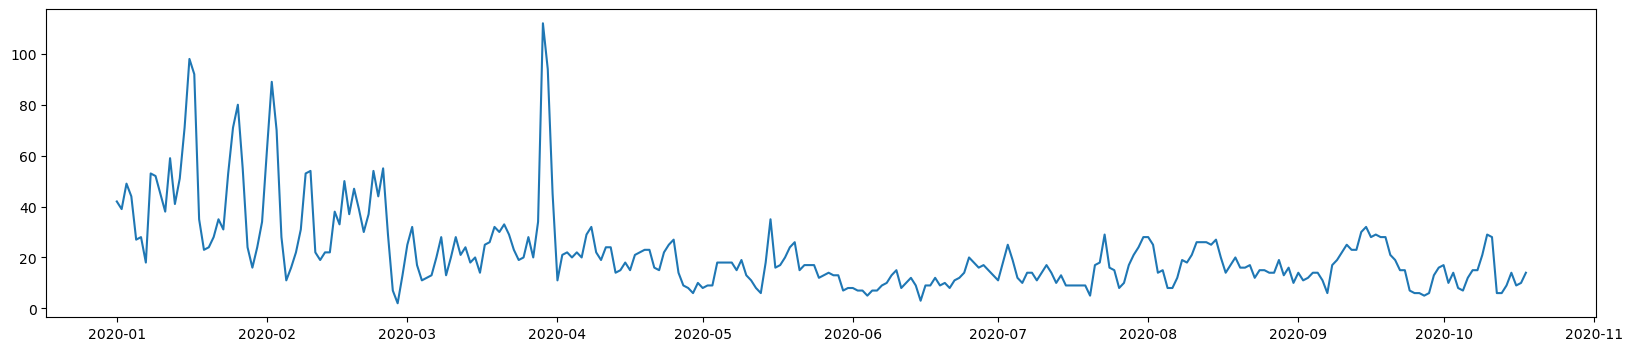

In [64]:
plt.figure(figsize = (20, 4))
plt.plot(pm10['PM10'])
plt.show()

In [65]:
no2 = pd.read_csv('data/NO2.csv')
no2

,datetime,NO2 (Biossido di azoto)
0,2020-01-01 00:00:00,16.0
1,2020-01-01 1:00:00,26.0
2,2020-01-01 2:00:00,25.0
3,2020-01-01 3:00:00,24.0
4,2020-01-01 4:00:00,32.0
...,...,...
6930,2020-10-15 20:00:00,43.0
6931,2020-10-15 21:00:00,37.0
6932,2020-10-15 22:00:00,38.0
6933,2020-10-15 23:00:00,33.0


In [66]:
no2['datetime'] = pd.to_datetime(no2['datetime'])

In [67]:
no2 = no2.set_index(['datetime'])

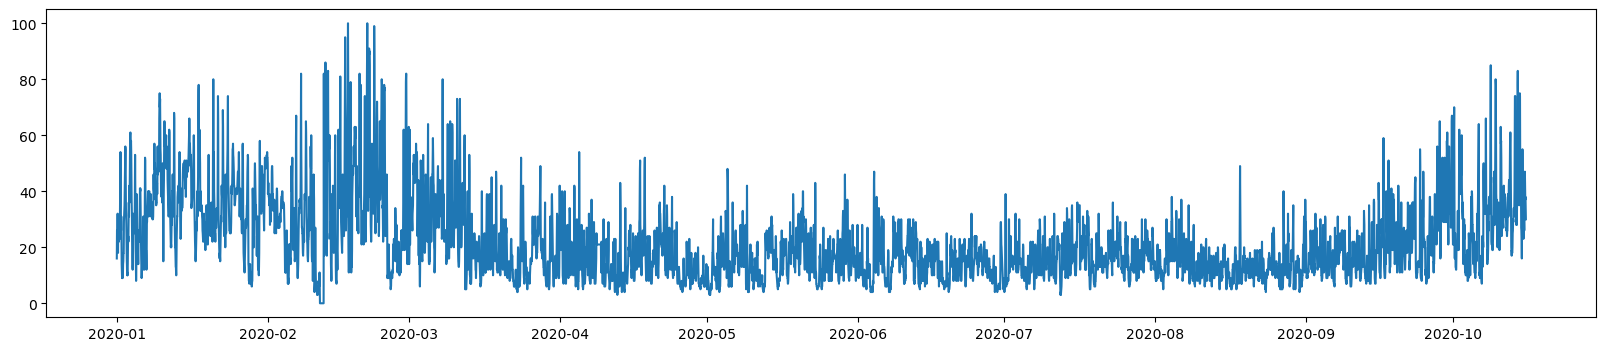

In [68]:
plt.figure(figsize = (20, 4))
plt.plot(no2['NO2 (Biossido di azoto)'])
plt.show()

In [70]:
sub_no2 = no2[:500]

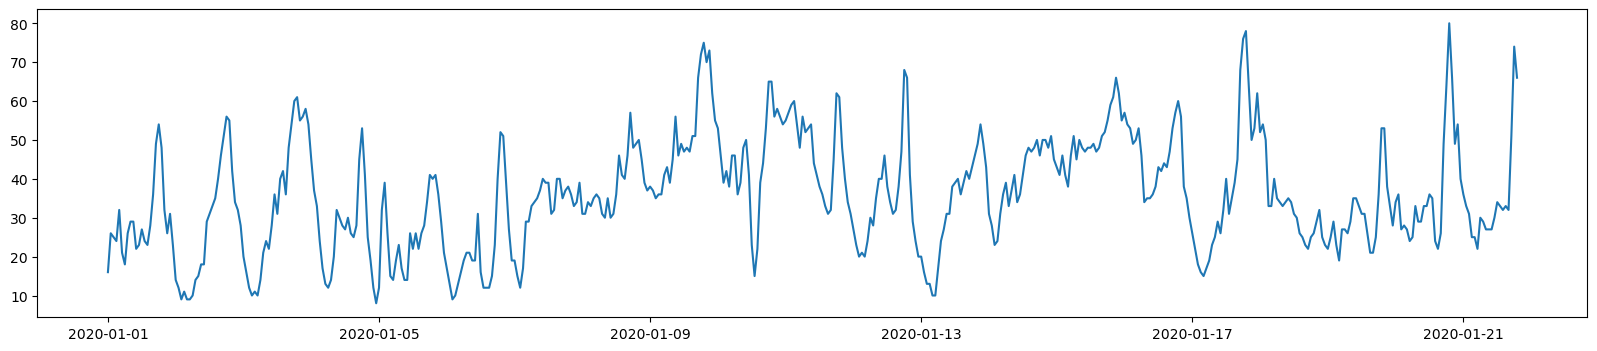

In [71]:
plt.figure(figsize = (20, 4))
plt.plot(sub_no2['NO2 (Biossido di azoto)'])
plt.show()

## Autoregression


##### Autoregression is a time series modeling method that uses observations from previous time steps as input to a regression equation to predict the value at the next time step. 

- the autoregression model makes an assumption that the observations at current and previous time steps are useful to predict the value at the next time step. 


- the relationship between observations in t and those in t+1 (or t-1) is called correlation.


- since it is a correlation of the time series with the lagged version of itself, it is called autocorrelation.


- simple idea that can result in accurate forecasts method on a range of time series problems.


###  How to explore a time series data for autocorrelation.

In [72]:
no2['lag1'] = no2['NO2 (Biossido di azoto)'].shift(1)

In [73]:
no2

,NO2 (Biossido di azoto),lag1
datetime,,
2020-01-01 00:00:00,16.0,NaN
2020-01-01 01:00:00,26.0,16.0
2020-01-01 02:00:00,25.0,26.0
2020-01-01 03:00:00,24.0,25.0
2020-01-01 04:00:00,32.0,24.0
...,...,...
2020-10-15 20:00:00,43.0,47.0
2020-10-15 21:00:00,37.0,43.0
2020-10-15 22:00:00,38.0,37.0


In [74]:
no2['lag2'] = no2['NO2 (Biossido di azoto)'].shift(2)
no2

,NO2 (Biossido di azoto),lag1,lag2
datetime,,,
2020-01-01 00:00:00,16.0,NaN,NaN
2020-01-01 01:00:00,26.0,16.0,NaN
2020-01-01 02:00:00,25.0,26.0,16.0
2020-01-01 03:00:00,24.0,25.0,26.0
2020-01-01 04:00:00,32.0,24.0,25.0
...,...,...,...
2020-10-15 20:00:00,43.0,47.0,41.0
2020-10-15 21:00:00,37.0,43.0,47.0
2020-10-15 22:00:00,38.0,37.0,43.0


In [75]:
no2['lag3'] = no2['NO2 (Biossido di azoto)'].shift(3)
no2

,NO2 (Biossido di azoto),lag1,lag2,lag3
datetime,,,,
2020-01-01 00:00:00,16.0,NaN,NaN,NaN
2020-01-01 01:00:00,26.0,16.0,NaN,NaN
2020-01-01 02:00:00,25.0,26.0,16.0,NaN
2020-01-01 03:00:00,24.0,25.0,26.0,16.0
2020-01-01 04:00:00,32.0,24.0,25.0,26.0
...,...,...,...,...
2020-10-15 20:00:00,43.0,47.0,41.0,39.0
2020-10-15 21:00:00,37.0,43.0,47.0,41.0
2020-10-15 22:00:00,38.0,37.0,43.0,47.0


In [76]:
no2 = no2.bfill()
no2

,NO2 (Biossido di azoto),lag1,lag2,lag3
datetime,,,,
2020-01-01 00:00:00,16.0,16.0,16.0,16.0
2020-01-01 01:00:00,26.0,16.0,16.0,16.0
2020-01-01 02:00:00,25.0,26.0,16.0,16.0
2020-01-01 03:00:00,24.0,25.0,26.0,16.0
2020-01-01 04:00:00,32.0,24.0,25.0,26.0
...,...,...,...,...
2020-10-15 20:00:00,43.0,47.0,41.0,39.0
2020-10-15 21:00:00,37.0,43.0,47.0,41.0
2020-10-15 22:00:00,38.0,37.0,43.0,47.0


### Compute the correlation between the time series and its lags at t1, t2, t3...

In [77]:
no2['NO2 (Biossido di azoto)'].corr(no2['lag1'])

0.9011263769179179

In [78]:
no2['NO2 (Biossido di azoto)'].corr(no2['lag2'])

0.7537023411824264

In [79]:
no2['NO2 (Biossido di azoto)'].corr(no2['lag3'])

0.6312582629008464

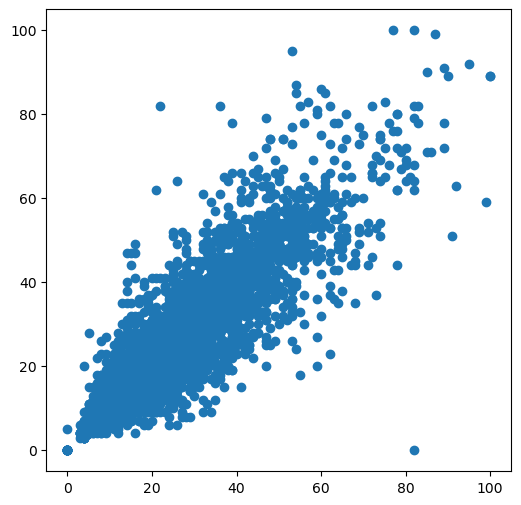

In [80]:
plt.figure(figsize = (6, 6))
plt.scatter(no2['NO2 (Biossido di azoto)'], no2['lag1'])
plt.show()

#### Autocorrelation Plots


-  plot the correlation coefficient for each lag variable. 


-  quickly have an idea of which lag variables may be good candidates for use in a predictive model 


-  how does the relationship between the observation and its historic values changes over time. 


-  use Pandas a built-in plot called the autocorrelation plot()

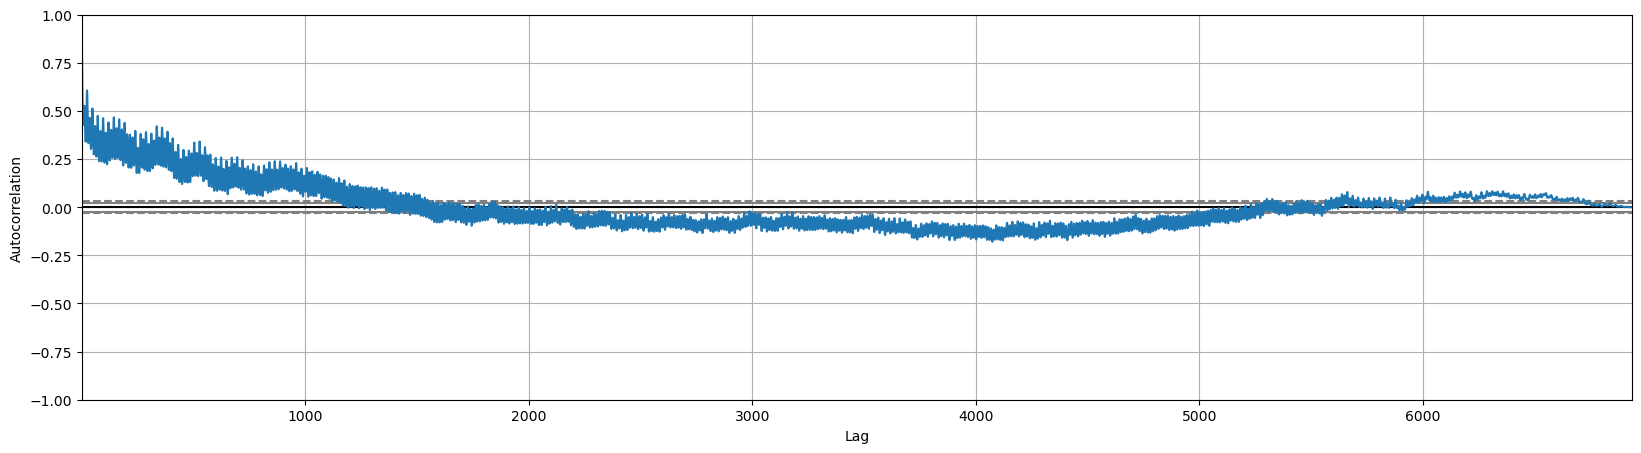

In [81]:
### Visualize autocorrelation plot 
plt.figure(figsize = (20, 5))
series = no2['NO2 (Biossido di azoto)']
autocorrelation_plot(series)
plt.show()

### Autocorrelation function. 

- ACF is an auto-correlation function which gives the values of auto-correlation of a time series with its lagged values.

- We plot these values along with the confidence band 

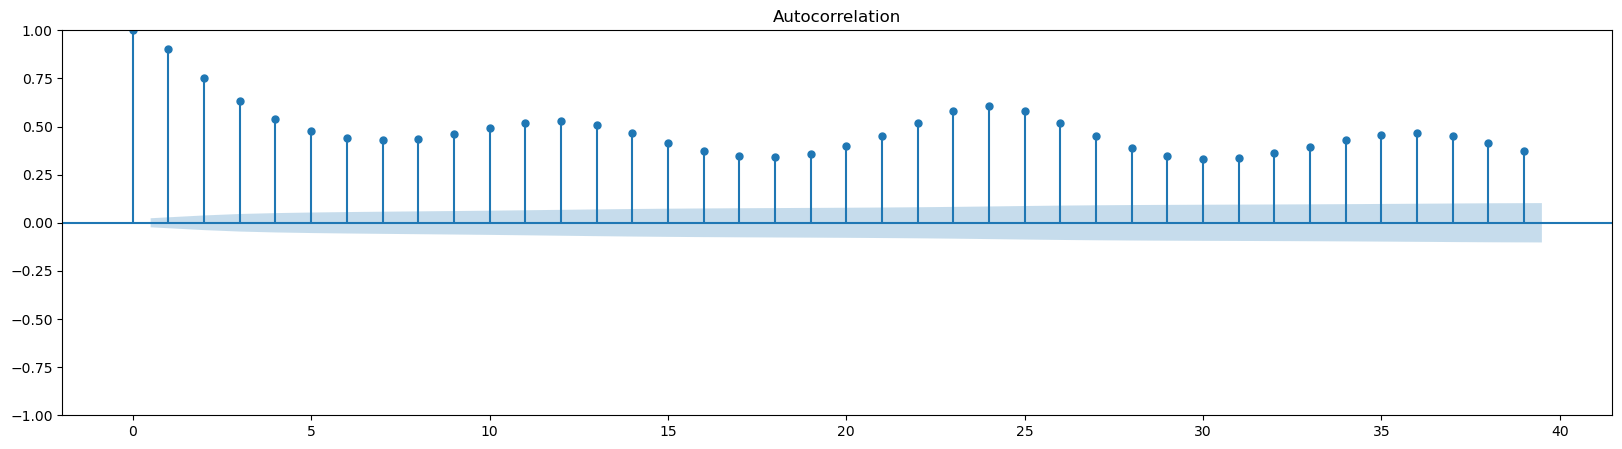

In [82]:
with plt.rc_context(): 
    plt.rc("figure", figsize = (20, 5))
    plot_acf(series)
    plt.show()

### Differencing

- Differencing is a method of transforming a time series dataset. 


- It is used to remove the series dependence on time, so-called temporal dependence. ... 


- Differencing can help stabilize the mean of the time series by removing changes in the level of a time series


- For eliminating (or reducing) trend and seasonality.

In [83]:
diff_no2 = no2['NO2 (Biossido di azoto)'].diff(1)
print(no2['NO2 (Biossido di azoto)'])

datetime
2020-01-01 00:00:00    16.0
2020-01-01 01:00:00    26.0
2020-01-01 02:00:00    25.0
2020-01-01 03:00:00    24.0
2020-01-01 04:00:00    32.0
                       ... 
2020-10-15 20:00:00    43.0
2020-10-15 21:00:00    37.0
2020-10-15 22:00:00    38.0
2020-10-15 23:00:00    33.0
2020-10-16 00:00:00    30.0
Name: NO2 (Biossido di azoto), Length: 6935, dtype: float64


In [84]:
diff_no2

datetime
2020-01-01 00:00:00     NaN
2020-01-01 01:00:00    10.0
2020-01-01 02:00:00    -1.0
2020-01-01 03:00:00    -1.0
2020-01-01 04:00:00     8.0
                       ... 
2020-10-15 20:00:00    -4.0
2020-10-15 21:00:00    -6.0
2020-10-15 22:00:00     1.0
2020-10-15 23:00:00    -5.0
2020-10-16 00:00:00    -3.0
Name: NO2 (Biossido di azoto), Length: 6935, dtype: float64

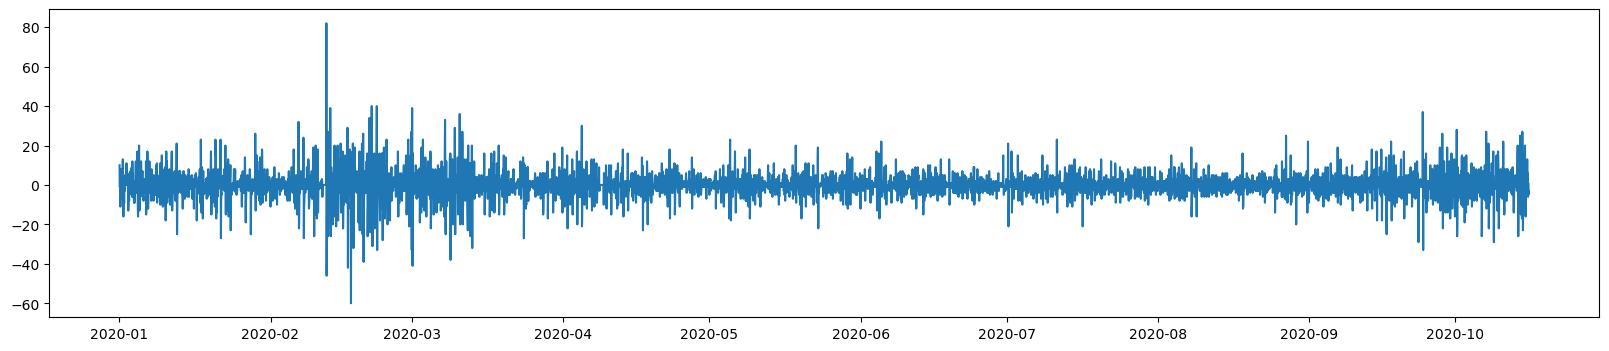

In [85]:
plt.figure(figsize = (20, 4))
plt.plot(diff_no2)
plt.show()

## Moving Average

#### Moving average can serve as a smoothing technique in time series forecasting. Moving average can be used for data preparation, feature engineering, and even directly for making predictions.

-  How moving average smoothing works and what to expect from it.
-  How to use moving average smoothing for data preparation and feature engineering.




### How to compute Moving Average. 

In [86]:
no2['ma5'] = no2['NO2 (Biossido di azoto)'].rolling(5).mean()
no2

,NO2 (Biossido di azoto),lag1,lag2,lag3,ma5
datetime,,,,,
2020-01-01 00:00:00,16.0,16.0,16.0,16.0,NaN
2020-01-01 01:00:00,26.0,16.0,16.0,16.0,NaN
2020-01-01 02:00:00,25.0,26.0,16.0,16.0,NaN
2020-01-01 03:00:00,24.0,25.0,26.0,16.0,NaN
2020-01-01 04:00:00,32.0,24.0,25.0,26.0,24.6
...,...,...,...,...,...
2020-10-15 20:00:00,43.0,47.0,41.0,39.0,39.2
2020-10-15 21:00:00,37.0,43.0,47.0,41.0,41.4
2020-10-15 22:00:00,38.0,37.0,43.0,47.0,41.2


In [87]:
no2.head(20)

,NO2 (Biossido di azoto),lag1,lag2,lag3,ma5
datetime,,,,,
2020-01-01 00:00:00,16.0,16.0,16.0,16.0,NaN
2020-01-01 01:00:00,26.0,16.0,16.0,16.0,NaN
2020-01-01 02:00:00,25.0,26.0,16.0,16.0,NaN
2020-01-01 03:00:00,24.0,25.0,26.0,16.0,NaN
2020-01-01 04:00:00,32.0,24.0,25.0,26.0,24.6
2020-01-01 05:00:00,21.0,32.0,24.0,25.0,25.6
2020-01-01 06:00:00,18.0,21.0,32.0,24.0,24.0
2020-01-01 07:00:00,26.0,18.0,21.0,32.0,24.2
2020-01-01 08:00:00,29.0,26.0,18.0,21.0,25.2


In [88]:
no2 = no2.bfill()
no2

,NO2 (Biossido di azoto),lag1,lag2,lag3,ma5
datetime,,,,,
2020-01-01 00:00:00,16.0,16.0,16.0,16.0,24.6
2020-01-01 01:00:00,26.0,16.0,16.0,16.0,24.6
2020-01-01 02:00:00,25.0,26.0,16.0,16.0,24.6
2020-01-01 03:00:00,24.0,25.0,26.0,16.0,24.6
2020-01-01 04:00:00,32.0,24.0,25.0,26.0,24.6
...,...,...,...,...,...
2020-10-15 20:00:00,43.0,47.0,41.0,39.0,39.2
2020-10-15 21:00:00,37.0,43.0,47.0,41.0,41.4
2020-10-15 22:00:00,38.0,37.0,43.0,47.0,41.2


In [89]:
no2['ma6'] = no2['NO2 (Biossido di azoto)'].rolling(6).mean()
no2

,NO2 (Biossido di azoto),lag1,lag2,lag3,ma5,ma6
datetime,,,,,,
2020-01-01 00:00:00,16.0,16.0,16.0,16.0,24.6,NaN
2020-01-01 01:00:00,26.0,16.0,16.0,16.0,24.6,NaN
2020-01-01 02:00:00,25.0,26.0,16.0,16.0,24.6,NaN
2020-01-01 03:00:00,24.0,25.0,26.0,16.0,24.6,NaN
2020-01-01 04:00:00,32.0,24.0,25.0,26.0,24.6,NaN
...,...,...,...,...,...,...
2020-10-15 20:00:00,43.0,47.0,41.0,39.0,39.2,37.666667
2020-10-15 21:00:00,37.0,43.0,47.0,41.0,41.4,38.833333
2020-10-15 22:00:00,38.0,37.0,43.0,47.0,41.2,40.833333


### Visualizing Moving Average as a simple curve.

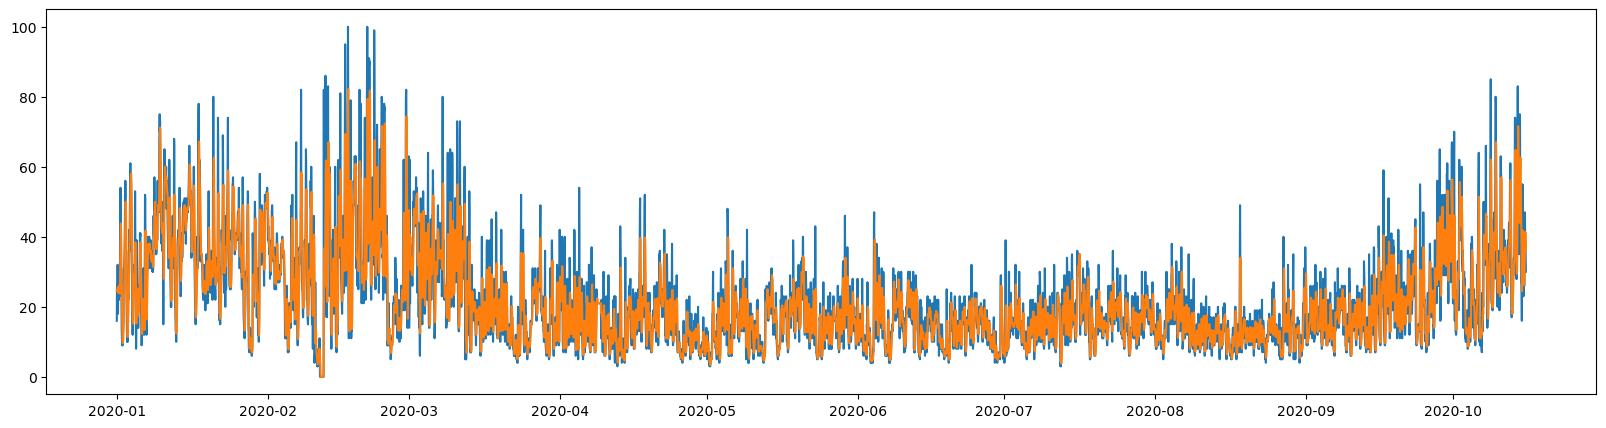

In [90]:
plt.figure(figsize = (20, 5))
plt.plot(no2['NO2 (Biossido di azoto)'])
plt.plot(no2['ma5'])
plt.show()

### A better graphics by considering only the first 500 values  .. and a legend!

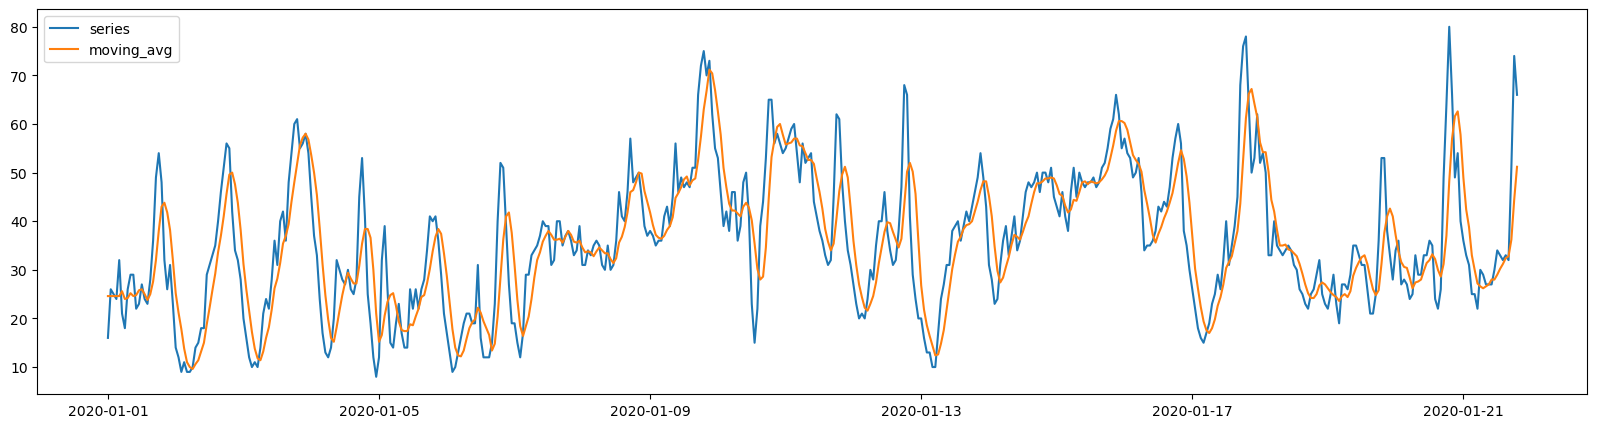

In [91]:
plt.figure(figsize = (20, 5))
plt.plot(no2['NO2 (Biossido di azoto)'][:500],"-", label="series")
plt.plot(no2['ma5'][:500],"-", label="moving_avg")

plt.legend(loc="upper left")

plt.show()

## Time series decomposition


#### Time series decomposition is about thinking of a series as a sum(or multiplication), of trend, seasonality, and noise components. 

- Decomposition provides a tool for for better understanding time series analysis and forecasting.


- How can decomposition of the time series help with forecasting.


- How to decompose additive and multiplicative time series problems and plot the results.

### How to decompose a time series into its components with Python

In [92]:
from statsmodels.tsa.seasonal import seasonal_decompose
dati = no2['NO2 (Biossido di azoto)'][:500]

In [124]:
dati_scomp = seasonal_decompose(dati, model = 'multiplicative')


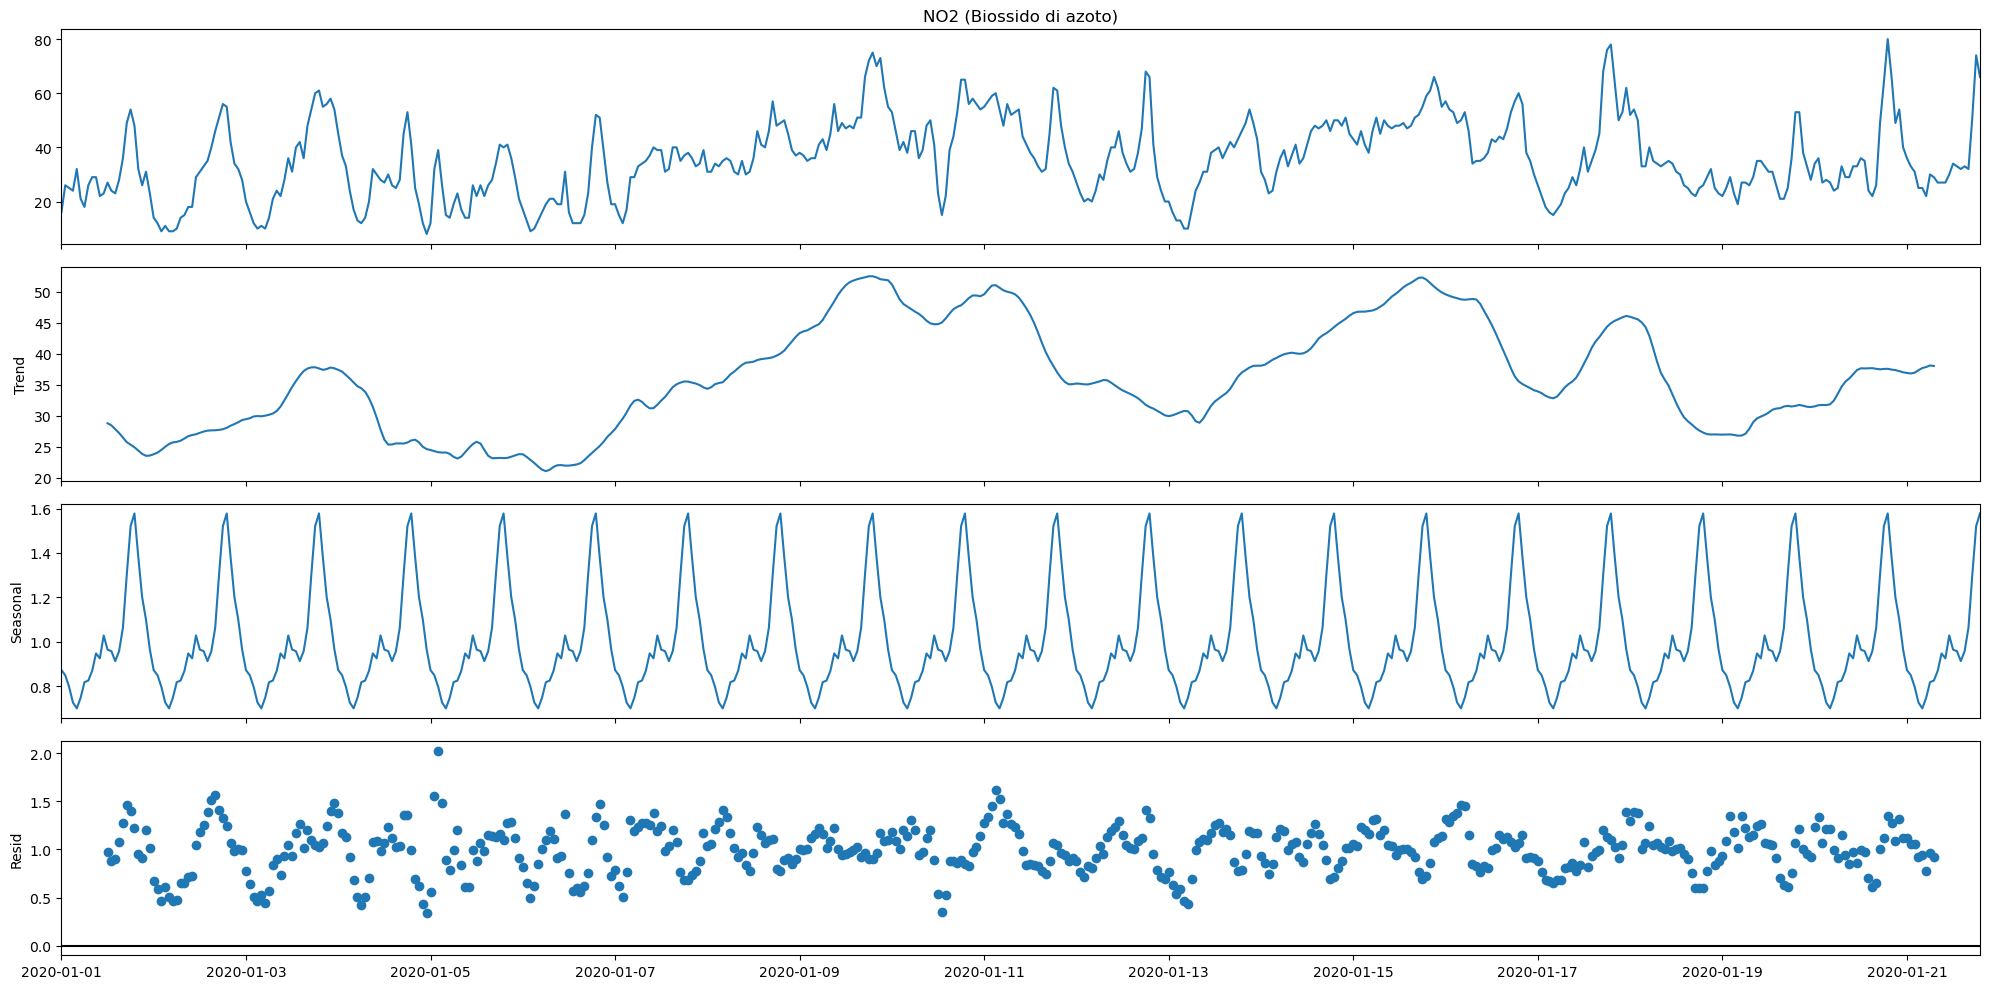

In [38]:
with plt.rc_context(): 
    plt.rc("figure", figsize = (20, 10))
    dati_scomp.plot()
    plt.show()

In [39]:
dati_scomp.seasonal[:100]

datetime
2020-01-01 00:00:00    0.871895
2020-01-01 01:00:00    0.848762
2020-01-01 02:00:00    0.796592
2020-01-01 03:00:00    0.726031
2020-01-01 04:00:00    0.699551
                         ...   
2020-01-04 23:00:00    0.964830
2020-01-05 00:00:00    0.871895
2020-01-05 01:00:00    0.848762
2020-01-05 02:00:00    0.796592
2020-01-05 03:00:00    0.726031
Name: seasonal, Length: 100, dtype: float64

In [40]:
import numpy
  
  
# create a 1D array
a = numpy.array([5, 2, 8, 9, 3, numpy.nan,
                 2, 6, 1, numpy.nan])
  
# remove nan values using numpy.isnan()
# and numpy.logical_not
b = a[numpy.logical_not(numpy.isnan(a))]
  
# print the results
print("original 1D array                    ->", a)
print("1D array after removing nan values   ->", b)
print()

original 1D array                    -> [ 5.  2.  8.  9.  3. nan  2.  6.  1. nan]
1D array after removing nan values   -> [5. 2. 8. 9. 3. 2. 6. 1.]



In [94]:
dati_scomp.resid[:100]

datetime
2020-01-01 00:00:00         NaN
2020-01-01 01:00:00         NaN
2020-01-01 02:00:00         NaN
2020-01-01 03:00:00         NaN
2020-01-01 04:00:00         NaN
                         ...   
2020-01-04 23:00:00    0.336715
2020-01-05 00:00:00    0.562238
2020-01-05 01:00:00    1.552053
2020-01-05 02:00:00    2.029371
2020-01-05 03:00:00    1.488255
Name: resid, Length: 100, dtype: float64

### Resampling

#####  Resampling involves changing the frequency of your time series observations. Two types of resampling are:

- Upsampling: Where you increase the frequency of the samples, such as from minutes to
seconds.


- Downsampling: Where you decrease the frequency of the samples, such as from days to
months.


In [97]:
no2.shape

(6935, 6)

In [98]:
 # take one observation every 24. In this case it is a downsampling as we move from hours to days.
no2_res = no2.iloc[::24, :]

In [99]:
no2_res.shape

(289, 6)

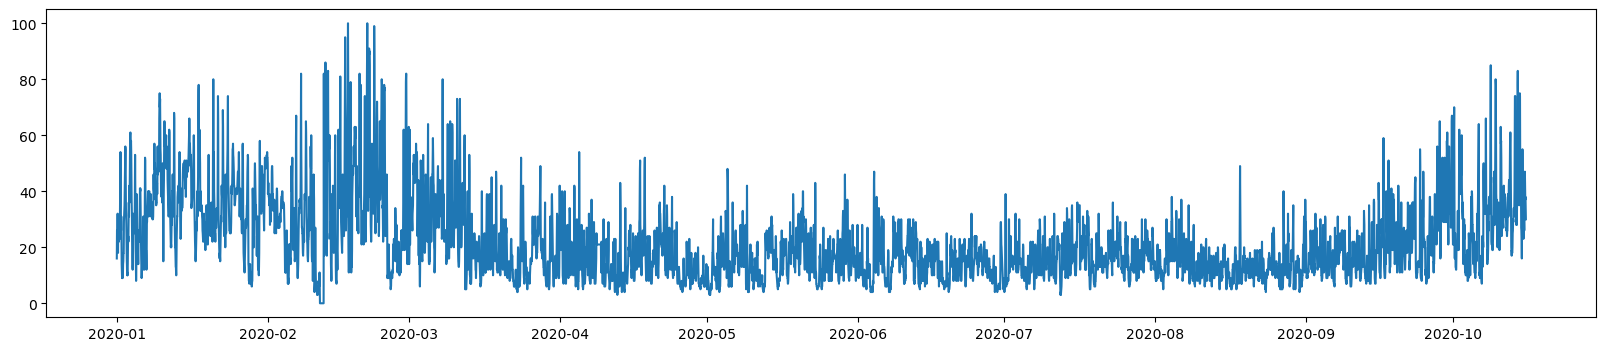

In [112]:
plt.figure(figsize = (20, 4))
plt.plot(no2['NO2 (Biossido di azoto)'])
plt.show()

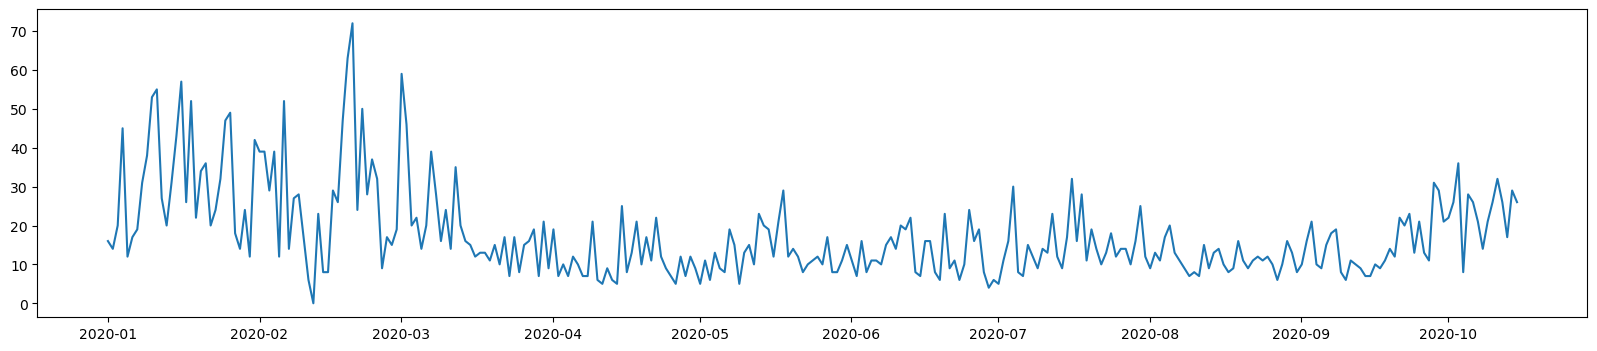

In [113]:
plt.figure(figsize = (20, 4))
plt.plot(no2_res['NO2 (Biossido di azoto)'])
plt.show()

In [114]:
no2_res.shape

(289, 6)

## Variability in a time series

#### Variability is the frequency with wich the observations change in absolute value in a given interval of time. 


- In finance, variability is also known as volatility.


- Volatility is a statistical measure of the dispersion of asset returns over time. It is often computed as the standard deviation or variance of price returns.


- Volatility describes uncertainties surrounding the potential price movement of financial assets. It is an essential concept widely used in risk management, portfolio optimization, and more. And it has been one of the most active areas of research in empirical finance and time series analysis. 


- the higher the volatility, the riskier a financial asset.


- impact on forecasting? If the volatility is high it will be harder to forecast.  

### How to measure the variability in a time series - (volatility in finance)

In [115]:
change_time =pm10['PM10'].pct_change()

In [116]:
change_time

datetime
2020-01-01         NaN
2020-01-02   -0.071429
2020-01-03    0.256410
2020-01-04   -0.102041
2020-01-05   -0.386364
                ...   
2020-10-14    0.500000
2020-10-15    0.555556
2020-10-16   -0.357143
2020-10-17    0.111111
2020-10-18    0.400000
Name: PM10, Length: 292, dtype: float64

In [117]:
change_time = change_time.bfill()
change_time

datetime
2020-01-01   -0.071429
2020-01-02   -0.071429
2020-01-03    0.256410
2020-01-04   -0.102041
2020-01-05   -0.386364
                ...   
2020-10-14    0.500000
2020-10-15    0.555556
2020-10-16   -0.357143
2020-10-17    0.111111
2020-10-18    0.400000
Name: PM10, Length: 292, dtype: float64

In [118]:
change_time.mean()

0.08811475614696491

In [119]:
volatility = change_time.std()

In [120]:
volatility 

0.546512090799261

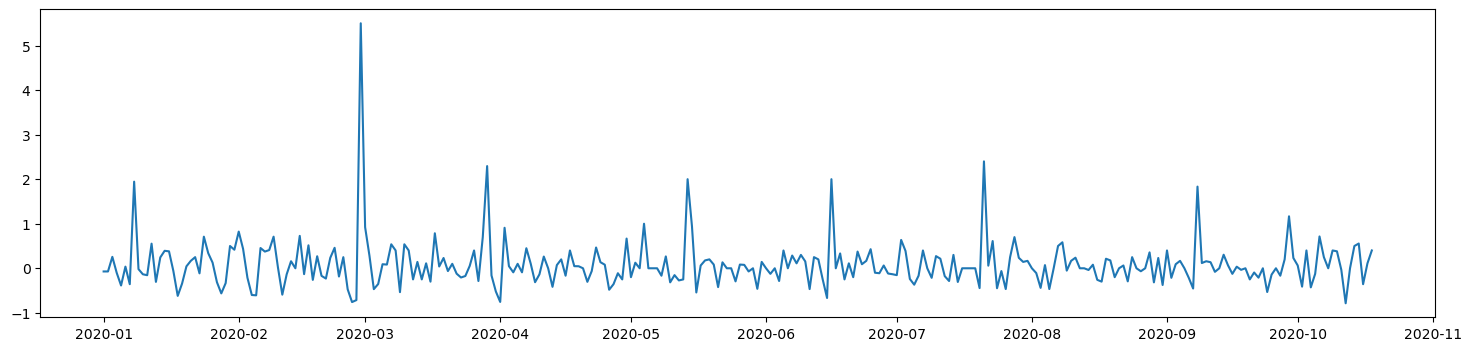

In [122]:
plt.figure(figsize = (18, 4))
plt.plot(change_time)
plt.show()

### Volatility modeling
##### A common assumption in time series modeling is that volatility remains constant over time. 

- However, heteroskedasticity, literally means "different dispersion" in ancient Greek, is frequently observed in financial return data. Volatility tends to increase or decrease systematically over time.


- How to detect heteroskedasticity?


- A straightforward way to detect heteroskedasticity in a time series is to plot the data and observe its behavior over time.  Compared with homoskedastic data, the volatility of heteroskedastic data does not appear stable, but exhibits time-dependent fluctuations.

<img src = "img/HeteroSchedasticity.png" >

## How to check if a time series is stationary 


#### There are many methods to check whether a time series (direct observations, residuals, etc..) is stationary or non-stationary.

-  Look at Plots: You can review a time series plot of your data and visually check if there are any obvious trends or seasonality.


-  Summary Statistics: You can review the summary statistics for your data for seasons or random partitions and check for obvious or significant differences.

    
-  Statistical Tests: You can use statistical tests to check if the expectations of stationarity are met or have been violated.


-  An example of this type of test is Augmented Dickey-Fuller test.

#### Summary Statistics 

-  A quick check to see if your time series is non-stationary is to review summary statistics. 


- split your time series into two (or more) partitions and compare the mean and variance of each group with a statistical test like a t-test. 


- If they differ and the difference is statistically significant, the time series is likely non-stationary

#### How to perform an Augmented Dickey-Fuller test.

- Null Hypothesis (H0): If accepted, it suggests the time series is non-stationary. It has some time dependent structure.

    
-  Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent
structure.


In [123]:
from statsmodels.tsa.stattools import adfuller

series = no2['NO2 (Biossido di azoto)'][:1000]
X = series.values

result = adfuller(X)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -1.763778
p-value: 0.398587
Critical Values:
	1%: -3.437
	5%: -2.865
	10%: -2.568


-  p-value > 0.05: Accept the null hypothesis (H0), the time series is non-stationary.
    
    
-  p-value ≤ 0.05: Reject the null hypothesis (H0), the time series is stationary.

In [111]:
# p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
# p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

SyntaxError: illegal target for annotation (1370510456.py, line 1)